# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

my_crypto = {
    "amounts": [1.2, 5.3]
}

tickers = ["BTC", "ETH"]

df_crypto =  pd.DataFrame(my_crypto, index=tickers)
df_crypto

,amounts
BTC,1.2
ETH,5.3


In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_price = float(btc_url[1.2]["close"])

# Fetch current ETH price
btc_price = float(eth_url[5.3]["close"])

# Compute current value of my crpto
my_btc_value = btc_price * df_crypto.loc["BTC"]
my_eth_value = eth_price * df_crypto.loc["ETH"]

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

TypeError: string indices must be integers

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_shares = {
    "shares": [50, 200]
}

tickers = ["SPY", "AGG"]

df_shares =  pd.DataFrame(my_shares, index=tickers)
df_shares

,shares
SPY,50
AGG,200


In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high    low    close   volume    open   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5  117.705  2750029  345.56   

                                                             
                             high     low   close    volume  
2020-10-09 00:00:00-04:00  347.35  344.89  346.84  45969566

In [15]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio["SPY"]["close"])
agg_close_price = float(df_portfolio["AGG"]["close"])

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $346.84
Current AGG closing price: $117.705


In [16]:
# Compute the current value of shares
my_spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
my_agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]

# Print current value of share
print(f"The current value of your SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your AGG shares is ${my_agg_value:0.2f}")

The current value of your SPY shares is $17342.00
The current value of your AGG shares is $23541.00


### Savings Health Analysis

In [34]:
# Set monthly household income
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

# Display savings DataFrame
#display(df_savings)

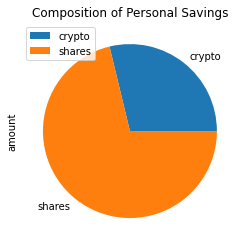

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-09', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-09', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG

tickers = ["AGG", "SPY"]

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-09 00:00:00-04:00  109.32  109.4650  109.2423  109.32  2717365.0   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   

                              SPY                                    
                             open    high     low   close    volume  
2015-10-09 00:00:00-04:00  201.37  201.90  200.58  201.36  74424197  
2015-10-12 00:00:00-04:00  201.42  201.76  200.91  201.55  42032769  
2015-10-13 00:00:00-04:00  200.65  202.16  200.05  200.22  72076783  
2015-10-14 00:00:00-04:00  200.18  200.87  198.94  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.64  202.33  96008389

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrity_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thrity_years.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
2015-10-09 00:00:00-04:00  109.32  109.4650  109.2423  109.32  2717365.0   
2015-10-12 00:00:00-04:00  109.48  109.6500  109.3300  109.63   816909.0   
2015-10-13 00:00:00-04:00  109.62  109.7500  109.4900  109.63  1360561.0   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661.0   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-09 00:00:00-04:00          NaN  201.37  201.90  200.58  201.36   
2015-10-12 00:00:00-04:00     0.002836  201.42  201.76  200.91  201.55   
2015-10-13 00:00:00-04:00     0.000000  200.65  202.16  200.05  200.22   
2015-10-14 00:00:00-04:00     0.003649  200.18  200.87  198.94  199.27   
2015-10-15 00:00:00-04:00    -0.001272  200.08  202.34  199.64  202.33   

                                                  
                             volume daily_return  
2015-10-09 00:00:00-04:00  74424197          NaN  
2015-10-12 00:00:00-04:00  42032769     0.000944  
2015-10-13 00:00:00-04:00  72076783    -0.006599  
2015-10-14 00:00:00-04:00  82856686    -0.004745  
2015-10-15 00:00:00-04:00  96008389     0.015356

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thrity_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011266,0.997577,0.992235,1.006507,0.990084,1.003084,0.993757,0.992854,0.995865,0.996453,...,1.012487,0.991015,0.993775,1.001712,1.003251,0.994088,1.013278,1.003899,0.984117,0.992094
2,1.014472,1.015281,0.999696,1.001455,0.992350,0.998961,0.990397,0.983636,0.999879,0.997511,...,1.024742,0.982466,0.986225,1.001715,1.004176,0.995310,1.005060,0.994092,0.985938,0.990420
3,1.013425,1.012647,1.004950,1.001568,1.000245,0.991405,1.004182,0.978831,0.998448,1.002457,...,1.022035,0.994964,0.987046,0.987475,0.993807,1.003486,1.007343,0.997632,0.967535,0.981128
4,1.023150,1.006479,1.015190,0.999564,1.006795,0.990548,1.002858,0.971652,0.995070,1.007501,...,1.021022,0.987691,0.977516,0.982957,1.000917,1.001590,1.003853,1.009456,0.966562,0.990437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.474114,11.219094,20.858132,13.607561,7.405041,17.607935,9.221984,10.450273,6.333319,3.385029,...,6.605729,21.659880,25.492668,13.263874,9.954632,4.464085,8.472166,5.208913,11.221861,10.938778
7557,10.488305,11.174549,20.891080,13.583185,7.360141,17.634826,9.180602,10.399428,6.322587,3.402252,...,6.541186,21.455432,25.642770,13.277158,10.066630,4.427612,8.470575,5.183683,11.188300,11.014517
7558,10.432184,11.291744,20.856205,13.584440,7.313109,17.641113,9.107451,10.339497,6.341862,3.401269,...,6.636218,21.188069,25.888558,13.323498,10.070680,4.427121,8.475396,5.169541,11.290636,11.072894
7559,10.486278,11.303772,20.819800,13.666260,7.422097,17.776214,9.036784,10.341936,6.295992,3.389321,...,6.673229,21.490726,25.946514,13.292079,10.096363,4.383281,8.442132,5.173658,11.205088,11.192647


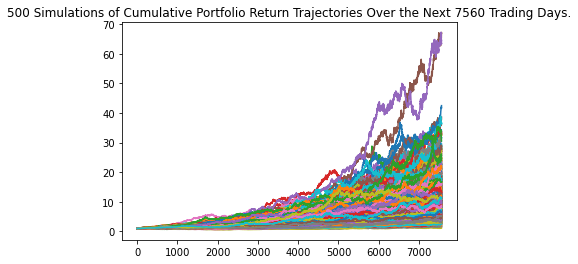

In [23]:
# Plot simulation outcomes
line_plot = MC_thrity_years.plot_simulation()

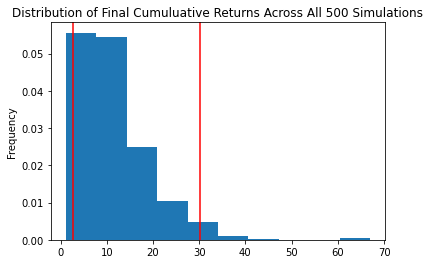

In [24]:
# Plot probability distribution and confidence intervals
dist_plot =MC_thrity_years.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thrity_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             11.646045
std               7.790635
min               1.139095
25%               6.397983
50%               9.905788
75%              14.746998
max              66.985468
95% CI Lower      2.730386
95% CI Upper     30.102336
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54607.71 and $602046.73


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81911.57 and $903070.09


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008520,0.992566,0.987217,0.993721,0.999588,1.000901,1.006413,0.993890,1.004707,0.982074,...,0.999657,1.001522,0.985404,1.003192,1.000084,0.993223,1.001300,1.004729,0.995181,1.012003
2,1.005579,0.978696,0.993446,0.987867,1.007821,1.009319,1.005460,0.990726,0.999211,0.978308,...,1.009163,1.001615,0.970830,1.001851,1.011759,1.000936,1.017210,1.001938,0.984230,1.004503
3,1.012808,0.977970,1.000918,0.990048,1.011558,1.003346,0.982717,0.996821,1.004472,0.987286,...,0.998557,1.009943,0.966384,1.001869,1.002290,0.989611,1.026235,1.003955,0.978662,0.987307
4,1.022893,0.980352,1.007113,0.991837,1.011979,0.987500,0.974878,1.004421,1.001258,0.991328,...,0.999567,0.996624,0.965479,1.004098,1.004055,0.995907,1.034384,1.014965,0.983366,0.995049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.130815,1.168626,0.851294,1.960030,1.531982,1.095231,1.485412,1.540706,1.155428,1.565625,...,1.148248,1.331441,1.163015,1.132931,1.244496,1.607915,1.559748,1.223610,0.981341,1.301384
1257,1.128979,1.172777,0.850781,1.955174,1.543014,1.108081,1.503409,1.537224,1.137020,1.560196,...,1.160120,1.321581,1.151198,1.145283,1.254144,1.612996,1.566803,1.207993,0.982854,1.288993
1258,1.134100,1.184126,0.846717,1.958142,1.544966,1.107862,1.507172,1.544762,1.141521,1.559259,...,1.165440,1.318669,1.146926,1.142401,1.251582,1.610716,1.571121,1.208494,0.972147,1.288396
1259,1.128117,1.182616,0.846283,1.974205,1.538127,1.099817,1.522617,1.533529,1.146393,1.581127,...,1.156571,1.308869,1.151164,1.126986,1.245042,1.606258,1.579634,1.202975,0.968357,1.274771


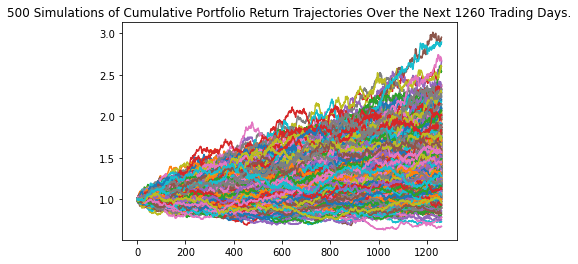

In [31]:
# Plot simulation outcomes
line_plot = MC_five_years.plot_simulation()

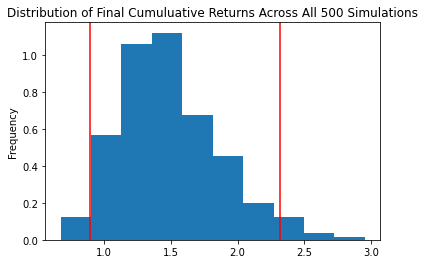

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_years.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.487086
std               0.375804
min               0.674170
25%               1.201400
50%               1.436583
75%               1.722812
max               2.953190
95% CI Lower      0.897248
95% CI Upper      2.320051
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


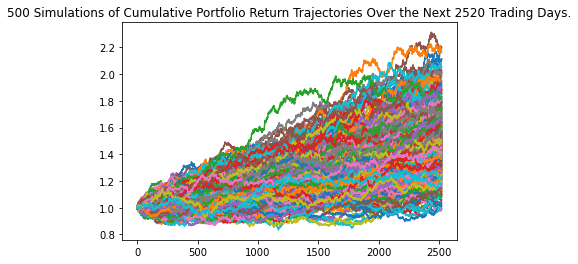

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

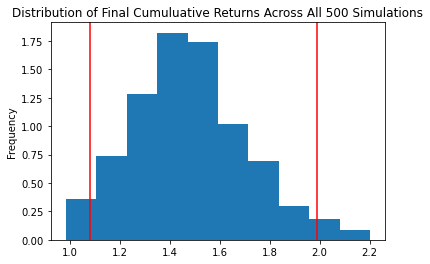

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
